# Entregáveis hands-on 8

## Prática 01: Ruído em comunicações analógicas

**Gere amostras de ruído AWGN e disserte sobre os seguintes gráficos:**
    
    Autocovariance normalizada;
    Espectro.

[> In getRealData (line 14)
  In stemHGUsingMATLABClasses (line 32)
  In stem (line 29)] 


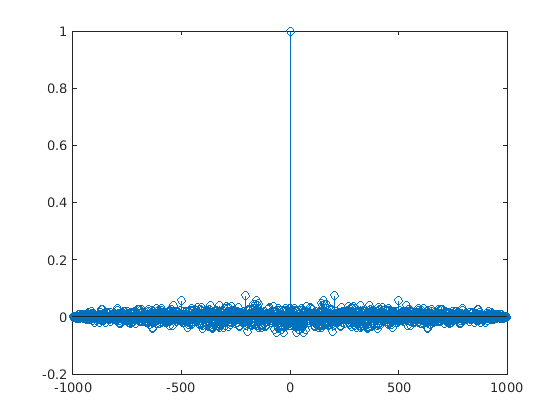

In [3]:
x = 0.1*(randn(1000,1)+1j*randn(1000,1));
[cov_ww,lags] = xcov(x,x,'coeff');

stem(lags,cov_ww)

/home/luciana/anaconda3/envs/py34/lib/python3.4/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Container object of 3 artists>

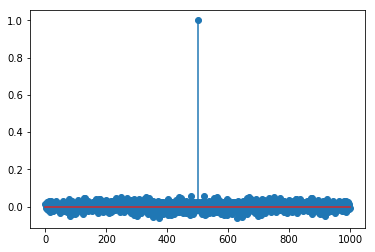

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

signal = np.random.normal(0,0.1,1000)+1j*np.random.normal(0,0.1,1000)

def xcov(x,y):
    acv = np.correlate(x-np.average(x),y-np.average(y), 'same')
    return acv/max(acv)


plt.stem(xcov(signal,signal))

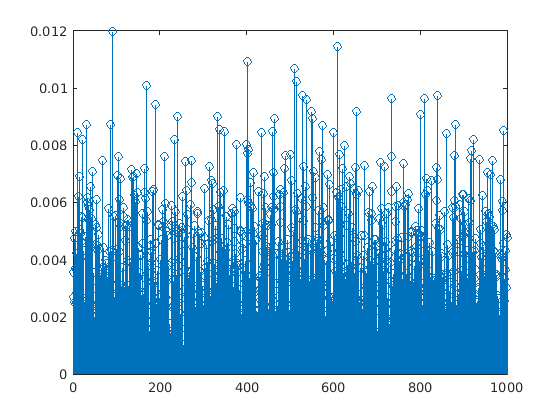

In [5]:

x = 0.1*(randn(1000,1)+1j*randn(1000,1));

lfft=length(x);                                     % Comprimento da fft
x=fftshift(fft(x,lfft)/lfft);                    % Sinal x(t) na frequência. 
Fs=1e3; 
freq = linspace(-Fs/2,Fs/2,Fs/lfft);
               
stem(abs(x))

<Container object of 3 artists>

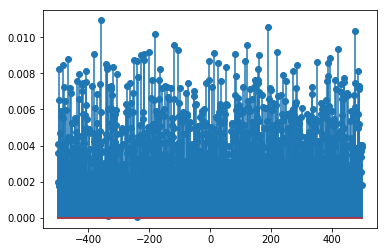

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftshift

%matplotlib inline

x = np.random.normal(0,0.1,1000)+1j*np.random.normal(0,0.1,1000)

lfft=len(x)                  # Comprimento da fft
x=fftshift(fft(x,lfft)/lfft) # Sinal x(t) na frequência. 
Fs=1e3 
freq = np.arange(-Fs/2,Fs/2,Fs/lfft)
               
plt.stem(freq, abs(x))

## Prática 02: Ruídos em comunicações digitais

In [6]:
close all; clc; clear all;

sinalReal = load('./Pratica_08_sinal_real.mat');
sinalComplexo = load('./Pratica_08_sinal_complexo.mat');

% Variáveis comuns a ambos os sinais
N = length(sinalComplexo.y);
fm = sinalComplexo.fm;
fs = sinalComplexo.fs;

% Variáveis sinal complexo
Ai = sinalComplexo.Ai;
Ar = sinalComplexo.Ar;
sinalComplexo  = sinalComplexo.y;

% Variáveis sinal real
Am = sinalReal.Am;
sinalReal = sinalReal.y;

% Sinais originais
Ts = 1/fs;
t=linspace(0, Ts*(N-1), N);
sinalRealOriginal = Am*cos(2*pi*fm*t);
sinalComplexoOriginal = Ar*cos(2*pi*fm*t)+1j*Ai*cos(2*pi*fm*t);

% Ruídos (ruido = sinal - sinaloriginal)
ruidoSinalReal = sinalReal - sinalRealOriginal;
ruidoSinalComplexo = sinalComplexo - sinalComplexoOriginal;

% Estimação da SNR pelas amostras do sinal recebido
pSinalReal = sum(abs(sinalRealOriginal.^2))/N;
pRuidoSinalReal = sum(abs(ruidoSinalReal.^2))/N;
SNR_sinalReal = 10*log10(pSinalReal/pRuidoSinalReal);

pSinalComplexo = sum(abs(sinalComplexoOriginal.^2))/N;
pRuidoSinalComplexo = sum(abs(ruidoSinalComplexo.^2))/N;
SNR_sinalComplexo = 10*log10(pSinalComplexo/pRuidoSinalComplexo);


% Mostrar informações
disp('Estimação de SNR: ')
disp(['   SNR Sinal Real: ' num2str(SNR_sinalReal) ' dB']);
disp(['   SNR Sinal Complexo: ' num2str(SNR_sinalComplexo) ' dB']);

Estimação de SNR: 
   SNR Sinal Real: 15.0435 dB
   SNR Sinal Complexo: 10.0384 dB


In [3]:
import numpy as np
from scipy.io import loadmat

sinalReal = loadmat('./Pratica_08_sinal_real.mat')
sinalComplexo = loadmat('./Pratica_08_sinal_complexo.mat')

# Variáveis comuns a ambos os sinais
N = len(sinalComplexo['y'].flatten())
fm = float(sinalComplexo['fm'])
fs = float(sinalComplexo['fs'])

# Variáveis sinal complexo
Ai = float(sinalComplexo['Ai'])
Ar = float(sinalComplexo['Ar'])
sinalComplexo  = sinalComplexo['y'].flatten()

# Variáveis sinal real
Am = float(sinalReal['Am'])
sinalReal = sinalReal['y']

# Sinais originais
Ts = 1/fs;
t=np.arange(0, N*Ts, Ts);
sinalRealOriginal = Am*np.cos(2*np.pi*fm*t);
sinalComplexoOriginal = Ar*np.cos(2*np.pi*fm*t)+1j*Ai*np.cos(2*np.pi*fm*t);

# Ruídos (ruido = sinal - sinaloriginal)
ruidoSinalReal = sinalReal - sinalRealOriginal;
ruidoSinalComplexo = sinalComplexo - sinalComplexoOriginal;

# Estimação da SNR pelas amostras do sinal recebido
pSinalReal = (np.linalg.norm(sinalRealOriginal)**2)/N
pRuidoSinalReal = (np.linalg.norm(ruidoSinalReal)**2)/N
SNR_sinalReal = 10*np.log10(pSinalReal/pRuidoSinalReal)

pSinalComplexo = (np.linalg.norm(sinalComplexoOriginal)**2)/N
pRuidoSinalComplexo = (np.linalg.norm(ruidoSinalComplexo)**2)/N
SNR_sinalComplexo = 10*np.log10(pSinalComplexo/pRuidoSinalComplexo)

# Mostrar informações
print('Estimação de SNR: ')
print(['   SNR Sinal Real: '+ str(SNR_sinalReal) +' dB']);
print(['   SNR Sinal Complexo: ' +str(SNR_sinalComplexo) +' dB']);


Estimação de SNR: 
['   SNR Sinal Real: 15.0434766237 dB']
['   SNR Sinal Complexo: 10.0383801478 dB']
